# Линейная регрессия


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Задача та же:

https://www.kaggle.com/competitions/home-data-for-ml-course/overview

In [ ]:
df = pd.read_csv('train.csv', sep=',')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
# ищем признаки с наиболее высокой корреляцией с целевой переменной

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols.tolist()].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)[:10]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
# взаимная корреляция признаков
df['GarageCars'].corr(df['GarageArea'])

np.float64(0.8824754142814625)

In [ ]:
df['OverallQual'].corr(df['GrLivArea'])

np.float64(0.59300743002865)

In [ ]:
# берем признаки с наиболее высокой корреляцией с целевой переменной

X = df[['GrLivArea', 'OverallQual','GarageCars']]
y = df['SalePrice']

In [ ]:
X.isnull().sum()

,0
GrLivArea,0
OverallQual,0
GarageCars,0


In [ ]:
# разобьем данные на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # размер тестовой выборки составит 30%

## Обучение базовой модели

Линейная регрессия:
* Хорошо работает, если зависимость между целевой переменной и признаками имеет линейный характер
* Хорошо интерпретируется
* Перед использованием лучше провести нормализацию данных, т.к масштаб влияет на веса


In [ ]:
# импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим модель класса LinearRegression
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

Теперь сделаем предсказания с помощью метода **.predict(X)**. Заметьте, что в метод **.fit(X, y)** мы подавали матрицу с признаками и вектор с правильными ответами. В метод **.predict(X)** мы подаем только матрицу с признаками, потому что мы хотим сделать предсказание.

In [ ]:
y_pred = model.predict(X_test)

#print(y_pred)

### Интерпретирумость

In [ ]:
model.coef_

array([   47.2285051 , 26772.48983385, 22239.45989805])

In [ ]:
model.intercept_

np.float64(-94208.72140326074)

In [ ]:
X_test[:1]

,GrLivArea,OverallQual,GarageCars
892,1068,6,1


In [ ]:
y_pred[0]

np.float64(139105.72094361507)

In [ ]:
-102167.47364811329 + 53.86337896*1868 + 26900.42219552*6 + 21244.52751777*2

202340.9064578267

In [ ]:
model.predict(X_test[:1])

array([139105.72094362])

## Оценка модели

Проверим результат. Воспользуемся метрикой RMSE

In [ ]:
from sklearn import metrics

# средняя абсолютная ошибка
print('MAE = ', metrics.mean_absolute_error(y_test, y_pred))

# корень среднеквадратической ошибки
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# коэффициент детерминации r-квадрат
# ~ нормированная среднеквадратичная ошибка
print('R2 = ', np.sqrt(metrics.r2_score(y_test, y_pred)))

# средняя абсолютная процентная ошибка
print('MAPE = ', np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

MAE =  28121.524151747963
RMSE =  43032.15048041463
R2 =  0.8709652947693258
MAPE =  0.4188966321779184


### Геометрический смысл

In [ ]:
X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  58471.75652552955


Text(0, 0.5, "The property's sale price in dollars")

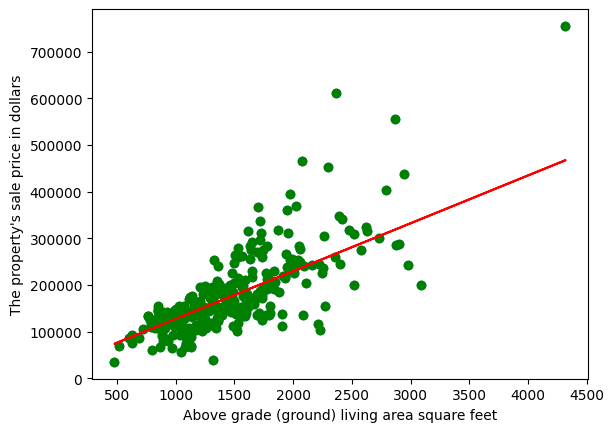

In [ ]:
# построим график
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_pred, color = 'red')

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('The property\'s sale price in dollars')

In [ ]:
model.coef_

array([102.48895892])

In [ ]:
model.intercept_

np.float64(24899.74815733818)

Text(0, 0.5, "The property's sale price in dollars")

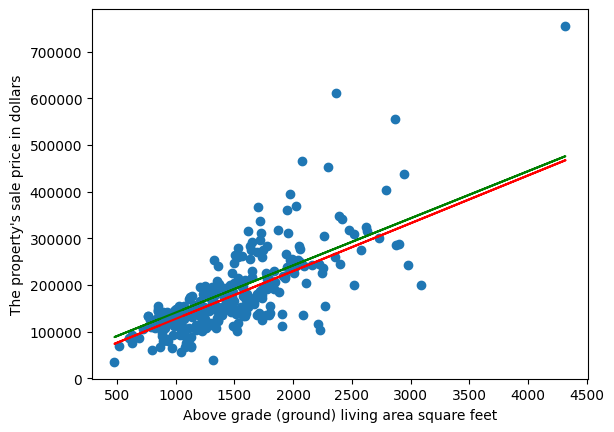

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red')
plt.plot(X_test, 40000 + X_test * 101, color='green')

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('The property\'s sale price in dollars')

## Улучшения

In [ ]:
#добавим логарифм цены
df['logSalePrice'] = np.log1p(df['SalePrice'])

#обратная - np.expm1
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016


In [ ]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  0.1939398967886489


In [ ]:
print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

RMSE =  35505.80572467265


In [ ]:
model.intercept_

np.float64(10.607446439534739)

In [ ]:
model.coef_

array([0.13933129, 0.00020906, 0.14086179])

### Нормализация

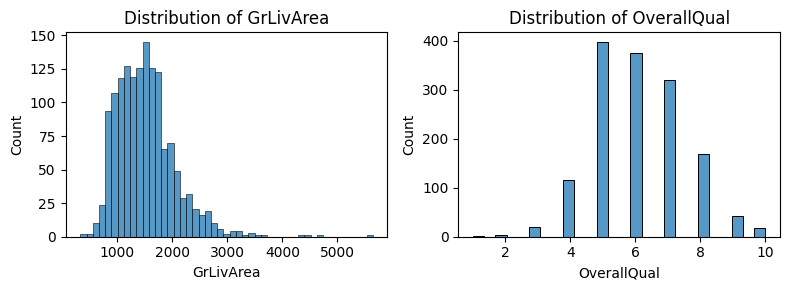

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(df['GrLivArea'], ax=axes[0])
axes[0].set_title('Distribution of GrLivArea')

sns.histplot(df['OverallQual'], ax=axes[1])
axes[1].set_title('Distribution of OverallQual')

plt.tight_layout()
plt.show()

<Axes: xlabel='GrLivArea'>

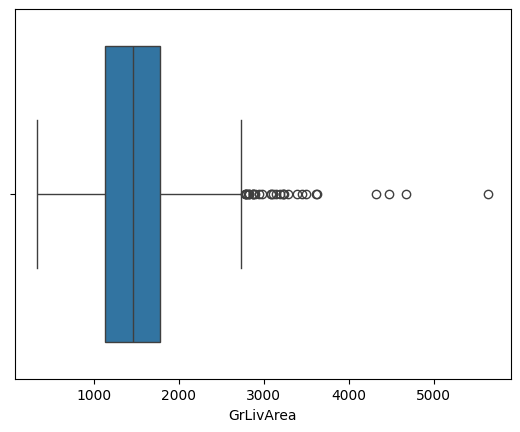

In [ ]:
sns.boxplot(x=df['GrLivArea'])

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

In [ ]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(X)
minmax_df = pd.DataFrame(minmax_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(X)
robust_df = pd.DataFrame(robust_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X)
standard_df = pd.DataFrame(standard_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

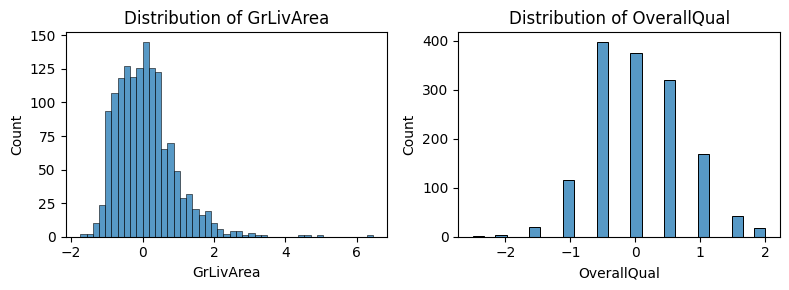

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(robust_df['GrLivArea'], ax=axes[0])
axes[0].set_title('Distribution of GrLivArea')

sns.histplot(robust_df['OverallQual'], ax=axes[1])
axes[1].set_title('Distribution of OverallQual')

plt.tight_layout()
plt.show()

In [ ]:
X = robust_df[['OverallQual', 'GarageCars', 'GrLivArea']]

y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  43032.15048041463


### Выбросы

In [ ]:
#Неправильно (хоть результат и кажется приятным)

df_filtered = df[df["GrLivArea"]<4000]

X = df_filtered[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df_filtered['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  35702.09888359374


In [ ]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

outliers = X_train[X_train["GrLivArea"]>4000].index
outliers

Index([1182, 523, 1298], dtype='int64')

In [ ]:
X_train = X_train.drop(outliers)
y_train = y_train.drop(outliers)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  42521.557863140835


In [ ]:
from sklearn.preprocessing import RobustScaler

X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

transformer = RobustScaler().fit(X)
transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  0.1939398967886489


In [ ]:
corr_matrix["SalePrice"].sort_values(ascending=False).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [ ]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  38535.06652287906


In [ ]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']]

## Регуляризация

### Заполнение пропусков

In [ ]:
X.isnull().sum().sort_values(ascending=False)[:4]

,0
GarageYrBlt,81
GrLivArea,0
GarageCars,0
GarageArea,0


In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

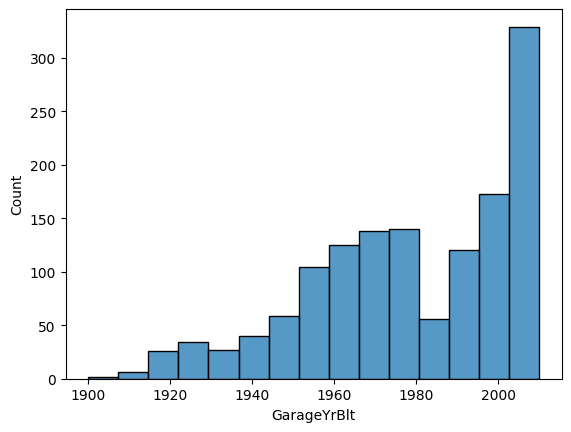

In [ ]:
sns.histplot(x=df['GarageYrBlt'])

In [ ]:
df['LotFrontage'].mean()

np.float64(70.04995836802665)

In [ ]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
df['GarageYrBlt'].mode()

,GarageYrBlt
0,2005.0


Также есть библиотека SimpleImputer

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

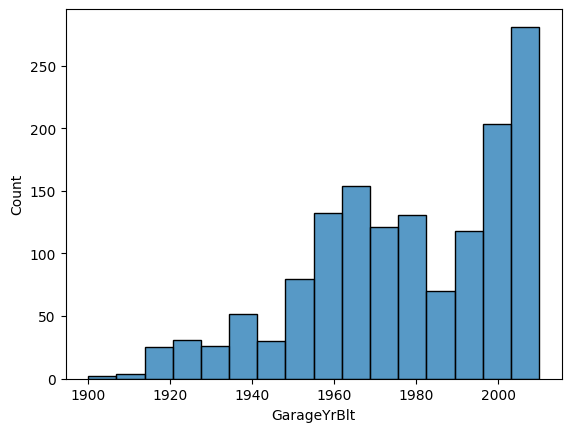

In [ ]:
sns.histplot(x=X['GarageYrBlt'])

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # 'median' 'most_frequent'

#df['GarageYrBlt'] = imputer.fit_transform(df['GarageYrBlt'].values.reshape(-1,1))

In [ ]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5, weights='uniform')

X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)

In [ ]:
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  36896.43290872752


In [ ]:
from sklearn.linear_model import Ridge

y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = Ridge(alpha=5.0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  36892.559521405


In [ ]:
from sklearn.linear_model import ElasticNet

y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = ElasticNet(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  37330.662840437144


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.594e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Lasso

y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = Lasso(alpha=0.1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  36896.403239228785


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.593e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
